## Policy Extraction Study ##

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read the csv file
hopper_stand_df = pd.read_csv("data/tdmpc2_hopper-stand_policy_extraction_study.csv")
hopper_hop_df = pd.read_csv("data/tdmpc2_hopper-hop_policy_extraction_study.csv")
pendulum_swingup_df = pd.read_csv("data/tdmpc2_pendulum-swingup_policy_extraction_study.csv")
cartpole_swingup_df = pd.read_csv("data/tdmpc2_cartpole-swingup_policy_extraction_study.csv")
walker_run_df = pd.read_csv("data/tdmpc2_walker-run_policy_extraction_study.csv")

# Plotting Reward #

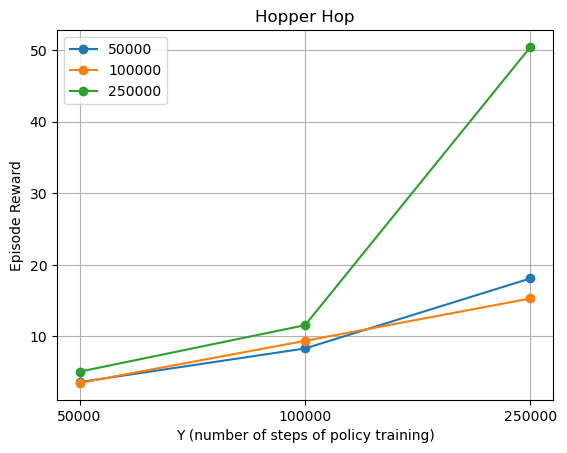

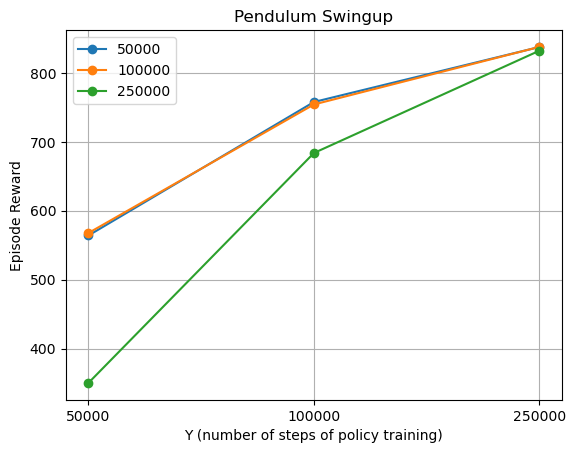

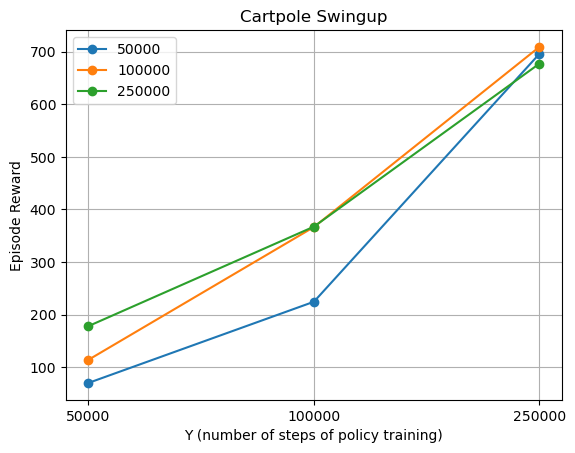

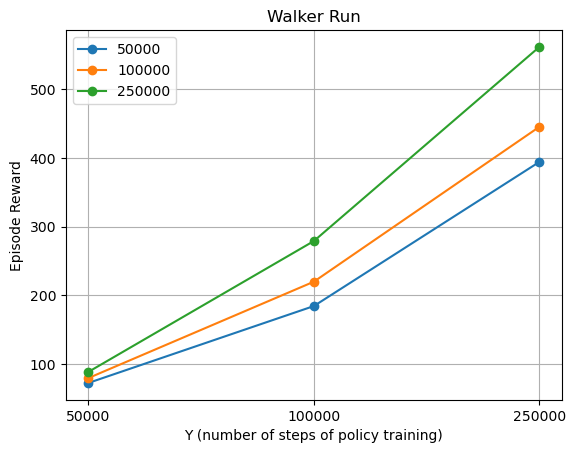

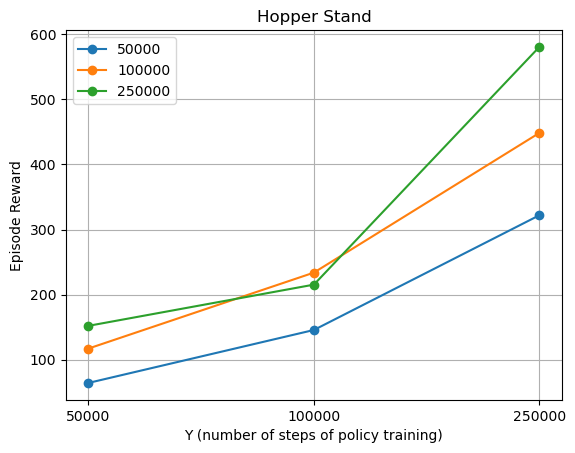

In [7]:

def plot_reward(df, title):
    # create a plot: 
    # - x-axis is the number of steps of policy extraction and y-axis is the reward

    X = [50000, 100000, 250000] # supervised model checkpoints

    plt1 = plt.figure()
    plt.ylabel('Episode Reward')
    plt.xlabel('Y (number of steps of policy training)')
    plt.xticks(range(len(X)), X)

    for i in range(len(X)):

        df1 = df.filter(like="/" + str(X[i]) + ".pt")
        
        # average the columns (similar to wandb grouping)
        df1 = df1.mean(axis=1)

        # time weighted ema smoothing of 0.95
        df1 = df1.ewm(alpha=0.05).mean()

        # remove nan values
        df1 = df1.dropna()

        # calculate the difference between each row
        diff = df1.diff()
        
        # let each index be the cumulative sum of the differences up to that point (i.e. the reward at that point) divided by the number of steps up to that point (i.e. the step number)
        reward = diff.cumsum()
        # diff = diff.cumsum() / range(1, len(diff)+1)
        
        # values of X where X % 2500 == 0 (model was saved every 2500 steps)
        idx = [i / 2500 for i in X]

        # only plot idx
        reward = reward[idx]

        # label each line with the model name
        plt.plot(range(len(reward)), reward, label=X[i], marker='o')

    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_reward(hopper_hop_df, "Hopper Hop")
plot_reward(pendulum_swingup_df, "Pendulum Swingup")
plot_reward(cartpole_swingup_df, "Cartpole Swingup")
plot_reward(walker_run_df, "Walker Run")
plot_reward(hopper_stand_df, "Hopper Stand")

# Plotting Reward per Step #

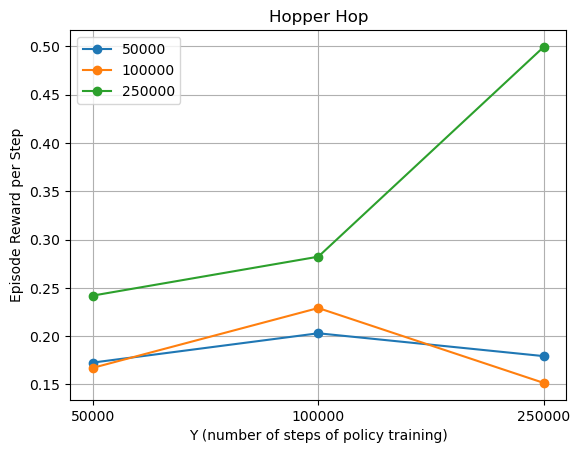

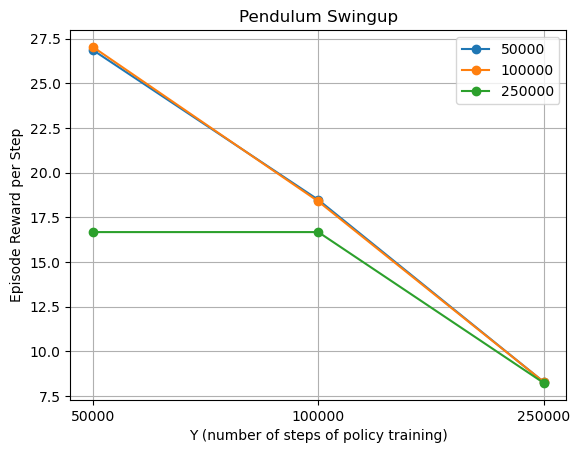

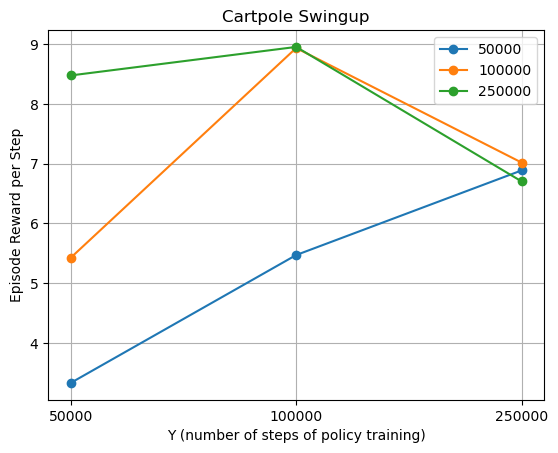

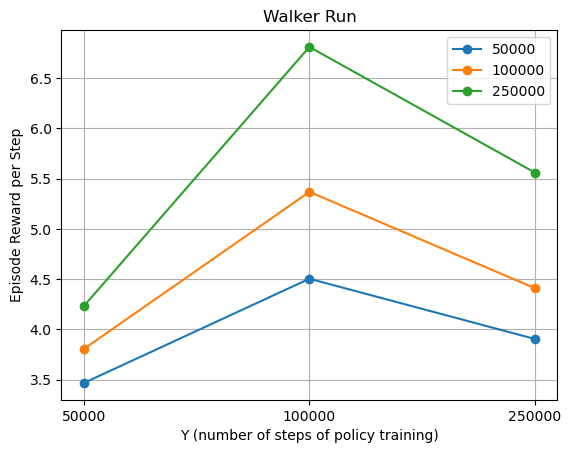

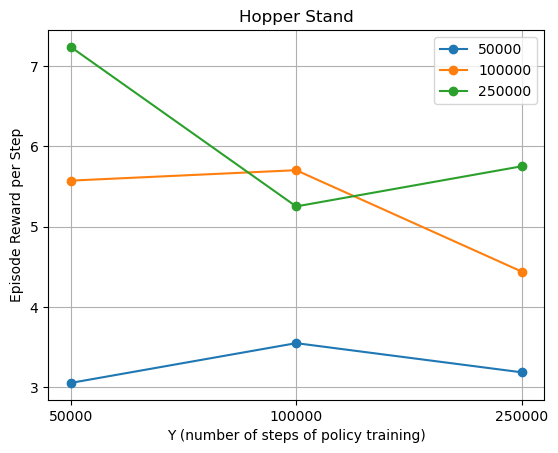

In [9]:
def plot_reward_per_step(df, title):
    # create a plot: 
    # - x-axis is the number of steps of policy extraction and y-axis is the reward per step

    X = [50000, 100000, 250000] # supervised model checkpoints

    plt1 = plt.figure()
    plt.ylabel('Episode Reward per Step')
    plt.xlabel('Y (number of steps of policy training)')
    plt.xticks(range(len(X)), X)

    for i in range(len(X)):

        df1 = df.filter(like="/" + str(X[i]) + ".pt")
        
        # average the columns (similar to wandb grouping)
        df1 = df1.mean(axis=1)

        # time weighted ema smoothing of 0.95
        df1 = df1.ewm(alpha=0.05).mean()

        # remove nan values
        df1 = df1.dropna()

        # calculate the difference between each row
        diff = df1.diff()
        
        # let each index be the cumulative sum of the differences up to that point (i.e. the reward at that point) divided by the number of steps up to that point (i.e. the step number)
        reward_per_step = diff.cumsum() / range(1, len(diff)+1)
        
        # values of X where X % 2500 == 0 (model was saved every 2500 steps)
        idx = [i / 2500 for i in X]

        # only plot idx
        reward_per_step = reward_per_step[idx]

        # label each line with the model name
        plt.plot(range(len(reward_per_step)), reward_per_step, label=X[i], marker='o')

    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

plot_reward_per_step(hopper_hop_df, "Hopper Hop")
plot_reward_per_step(pendulum_swingup_df, "Pendulum Swingup")
plot_reward_per_step(cartpole_swingup_df, "Cartpole Swingup")
plot_reward_per_step(walker_run_df, "Walker Run")
plot_reward_per_step(hopper_stand_df, "Hopper Stand")